# Hydrological Data Analysis

## Introduction

In this stage, we will conduct a preliminary analysis using the hydrological data from Cedar Lake near Oleson Point station, which has been provided by Manitoba Hydro.

## Import all necessary libraries

In [2]:
import pandas as pd

import matplotlib.pyplot as plt # used in time series analysis
import seaborn as sns # used for correlatuion analysis

from statsmodels.tsa.arima.model import ARIMA # for prediction analysis

# for linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Data Preprocessing

In [3]:
def readCSV(inputCSV):
    df = pd.read_csv(inputCSV)
    df['Date'] = pd.to_datetime(df['Date']).dt.date
    display(df)
    return df
    
df = readCSV("cedar_lake_hydrological_data.csv")


,Date,Water Level(metre),Water Temperature(degree celsius),Air Temperature(degree celsius),Percipitation(millimetre),Relative Humidity(percentage),Atmospheric Pressure(kilopascal)
0,2022-09-27,256.176,1.700,12.210,0.00,65.952,99.285
1,2022-09-28,256.174,1.700,13.796,0.20,62.892,98.503
2,2022-09-29,256.191,1.700,15.463,0.00,69.302,98.401
3,2022-09-30,256.184,1.700,10.721,0.00,65.904,99.373
4,2022-10-01,256.184,1.700,11.065,0.00,62.327,99.639
...,...,...,...,...,...,...,...
362,2023-09-24,255.870,16.561,15.779,0.00,81.815,98.475
363,2023-09-25,255.876,16.300,16.440,0.00,84.056,98.810
364,2023-09-26,255.868,16.628,17.146,0.04,78.560,98.872
365,2023-09-27,255.863,16.744,17.548,0.00,74.744,98.069


## Basic Data Summary:

In [4]:
# Get basic statistics for numerical columns
print(df.describe())

       Water Level(metre)  Water Temperature(degree celsius)  \
count          367.000000                         367.000000   
mean           255.507728                           7.405646   
std              0.553919                           8.370073   
min            254.534000                           0.200000   
25%            254.934500                           0.500000   
50%            255.669000                           1.700000   
75%            255.870500                          17.660000   
max            256.300000                          23.269000   

       Air Temperature(degree celsius)  Percipitation(millimetre)  \
count                       367.000000                 367.000000   
mean                          2.109289                   0.479809   
std                          14.735556                   1.560334   
min                         -28.196000                   0.000000   
25%                         -10.522000                   0.000000   
50%      

## Time Series Analysis for station: Cedar Lake near Oleson Point
### Time Range: 2022-09-27 to 2023-09-28	
---

### Monthly Mean Water Level

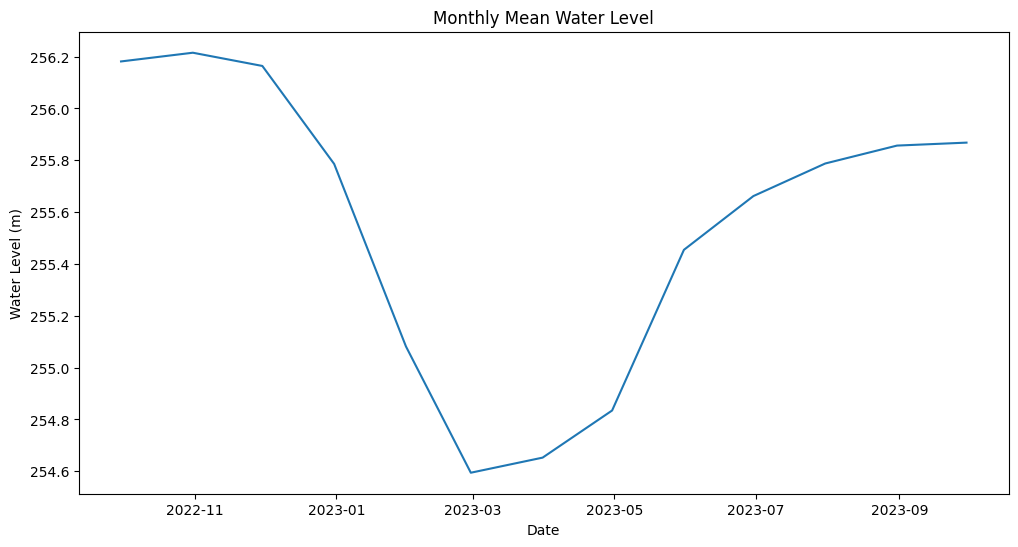

In [5]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' column as the index for time series analysis
df.set_index('Date', inplace=True)

# Resample data to a specific frequency (e.g., monthly) and calculate the mean
monthly_mean = df.resample('M').mean()

# Plot water level over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_mean['Water Level(metre)'])
plt.title('Monthly Mean Water Level')
plt.xlabel('Date')
plt.ylabel('Water Level (m)')
plt.show()

### Daily Water Level:

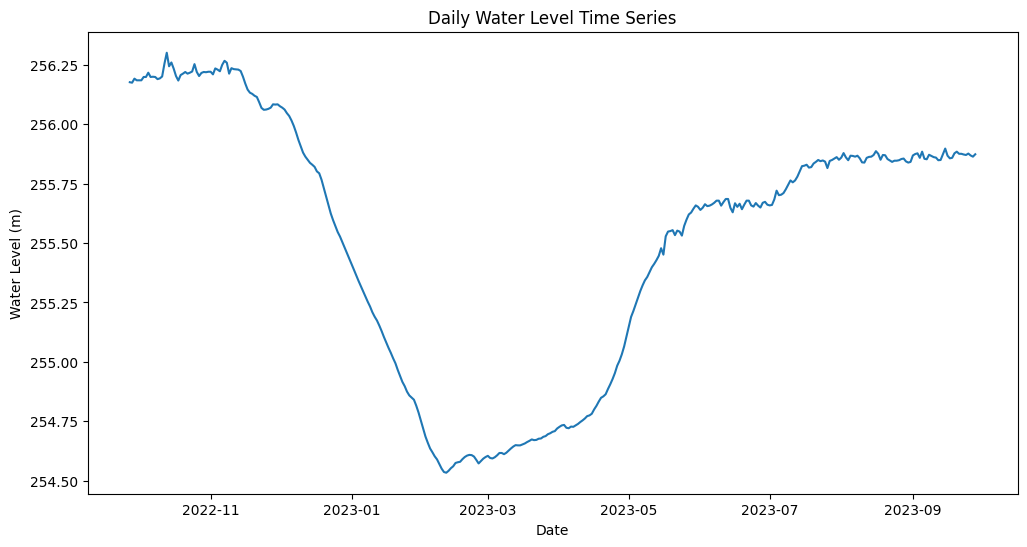

In [6]:
# Resample data to daily frequency and forward fill missing values
daily_data = df.resample('D').ffill()
degree_sign = u'\N{DEGREE SIGN}'

# Plot daily water level
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Water Level(metre)'])
plt.title('Daily Water Level Time Series')
plt.xlabel('Date')
plt.ylabel('Water Level (m)')
plt.show()

### Daily Water Temperature:

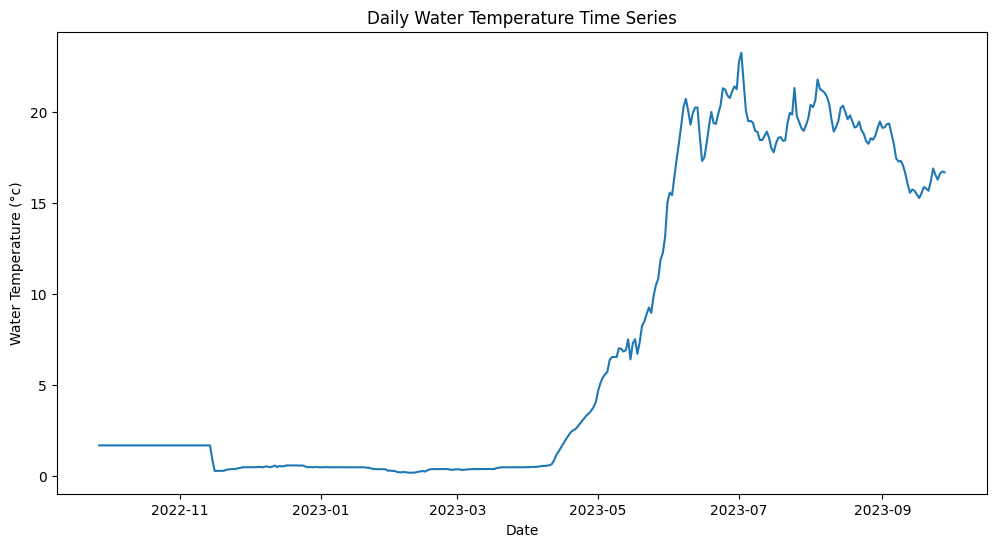

In [7]:
# Plot daily water temperature
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Water Temperature(degree celsius)'])
plt.title('Daily Water Temperature Time Series')
plt.xlabel('Date')
plt.ylabel('Water Temperature (' + degree_sign + 'c)')
plt.show()

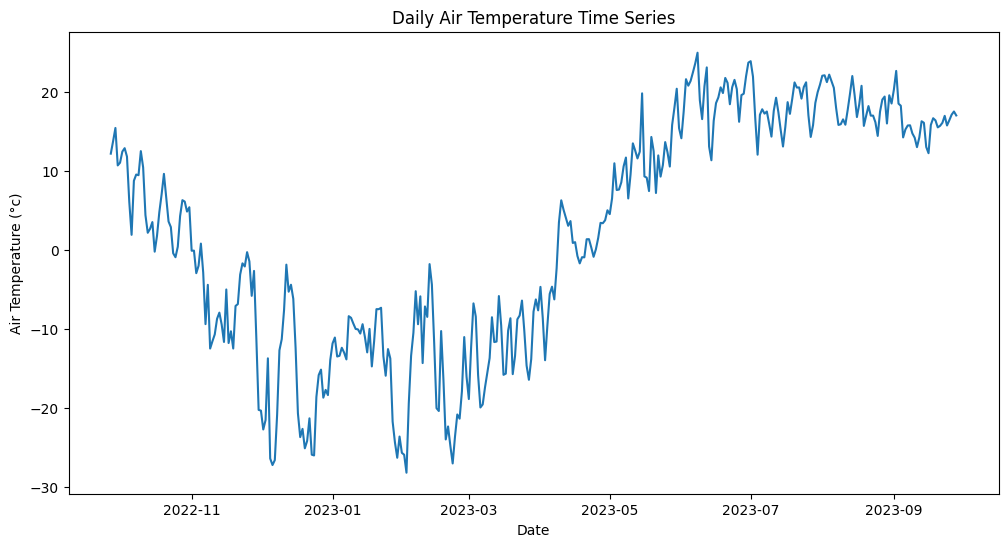

In [8]:
# Plot daily air temperature
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Air Temperature(degree celsius)'])
plt.title('Daily Air Temperature Time Series')
plt.xlabel('Date')
plt.ylabel('Air Temperature (' + degree_sign + 'c)')
plt.show()

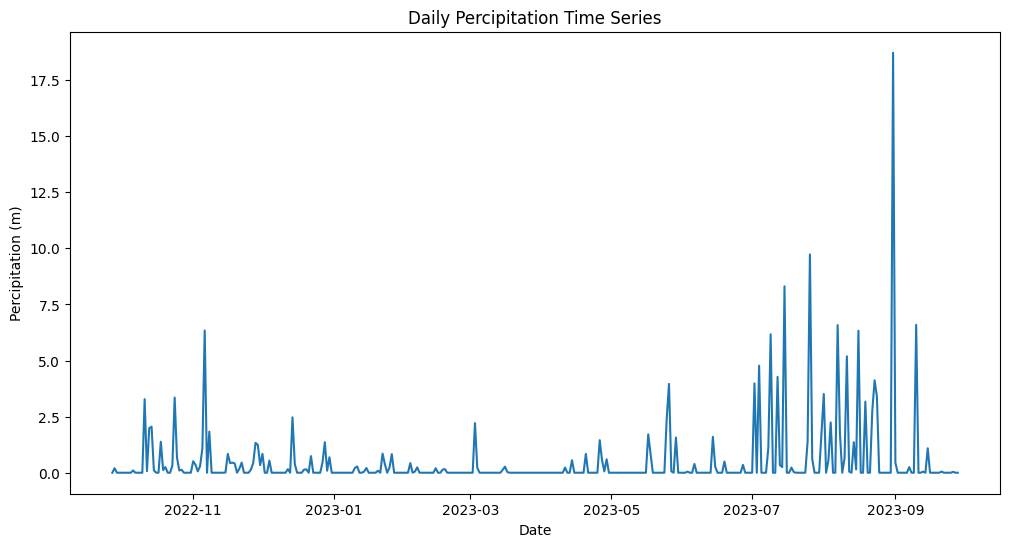

In [9]:
# Plot daily percipitation
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Percipitation(millimetre)'])
plt.title('Daily Percipitation Time Series')
plt.xlabel('Date')
plt.ylabel('Percipitation (m)')
plt.show()

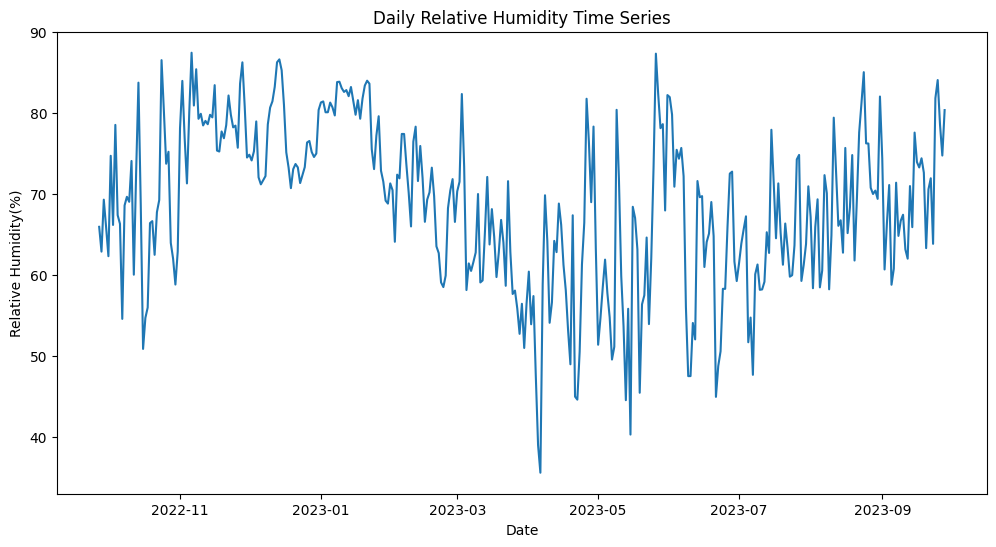

In [10]:
# Plot daily Relative Humidity
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Relative Humidity(percentage)'])
plt.title('Daily Relative Humidity Time Series')
plt.xlabel('Date')
plt.ylabel('Relative Humidity(%)')
plt.show()

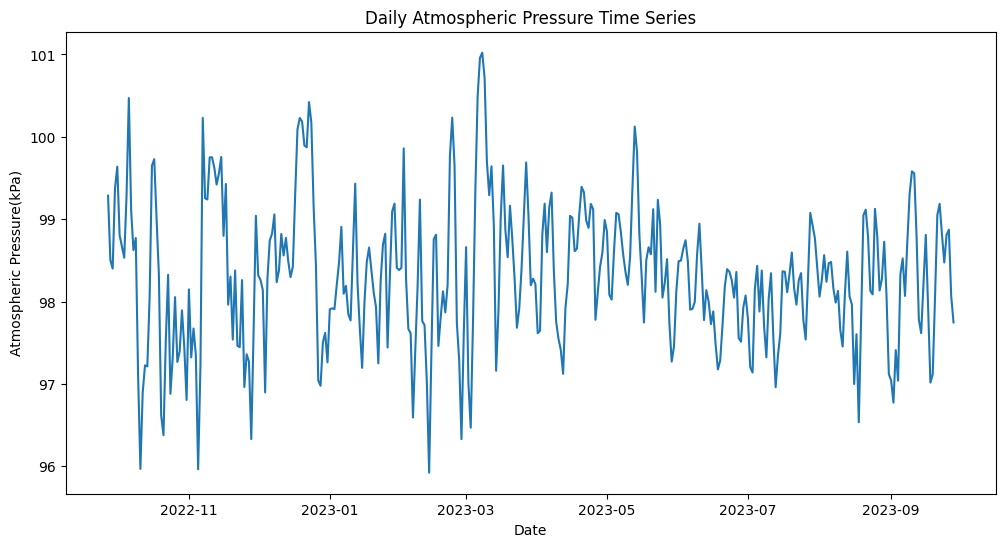

In [11]:
# Plot daily Atmospheric Pressure(kilopascal)
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Atmospheric Pressure(kilopascal)'])
plt.title('Daily Atmospheric Pressure Time Series')
plt.xlabel('Date')
plt.ylabel('Atmospheric Pressure(kPa)')
plt.show()

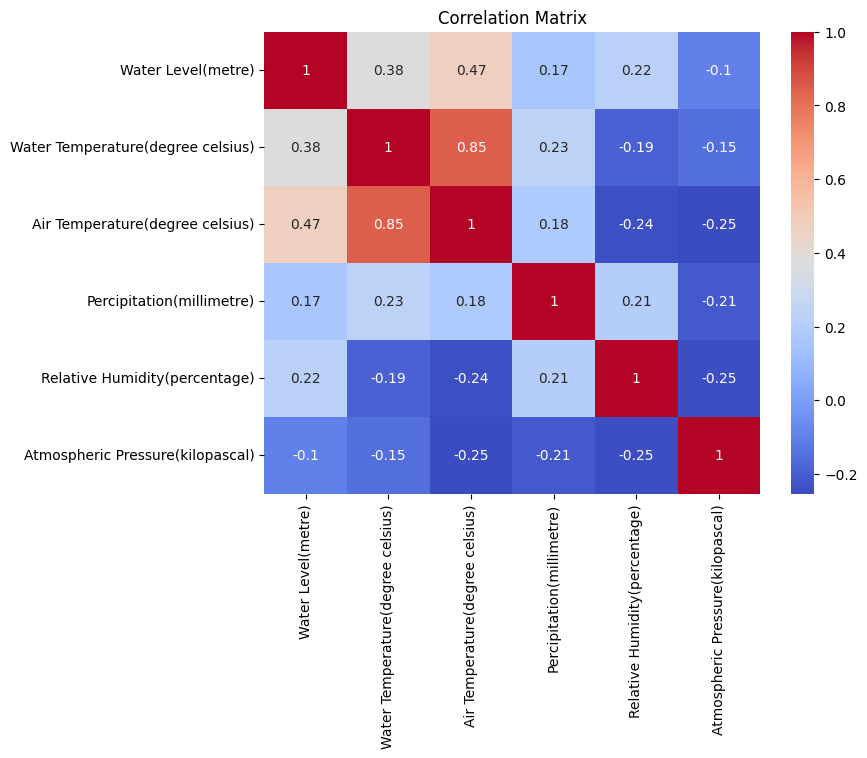

In [12]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Humidity vs. Water Level Analysis:

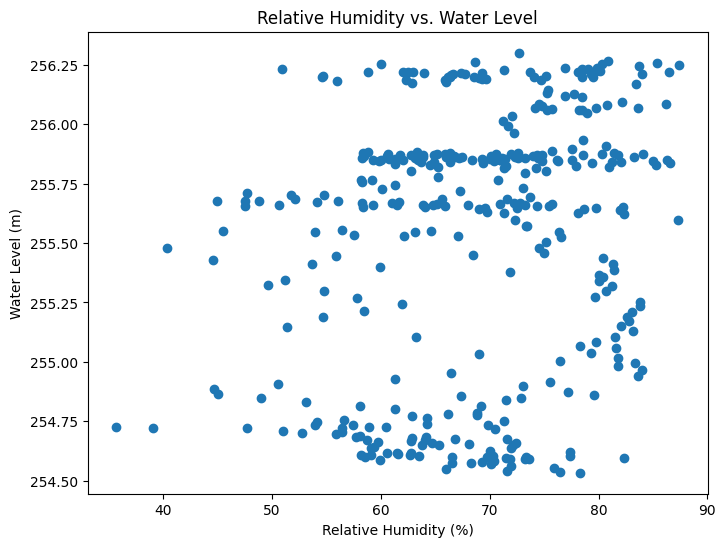

In [13]:
# Scatter plot for Relative Humidity vs. Water Level
plt.figure(figsize=(8, 6))
plt.scatter(df['Relative Humidity(percentage)'], df['Water Level(metre)'])
plt.title('Relative Humidity vs. Water Level')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Water Level (m)')
plt.show()


### Precipitation vs. Water Level Analysis:

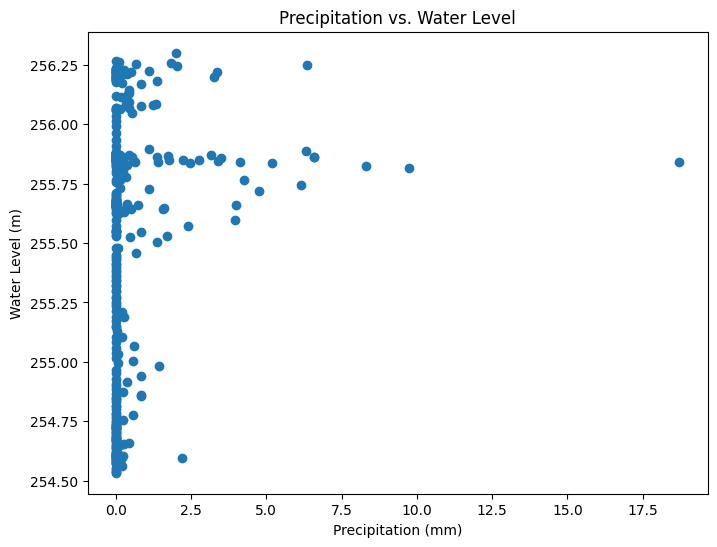

In [14]:
# Scatter plot for Precipitation vs. Water Level
plt.figure(figsize=(8, 6))
plt.scatter(df['Percipitation(millimetre)'], df['Water Level(metre)'])
plt.title('Precipitation vs. Water Level')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Water Level (m)')
plt.show()

### Relative Humidity vs. Atmospheric Pressure Analysis:

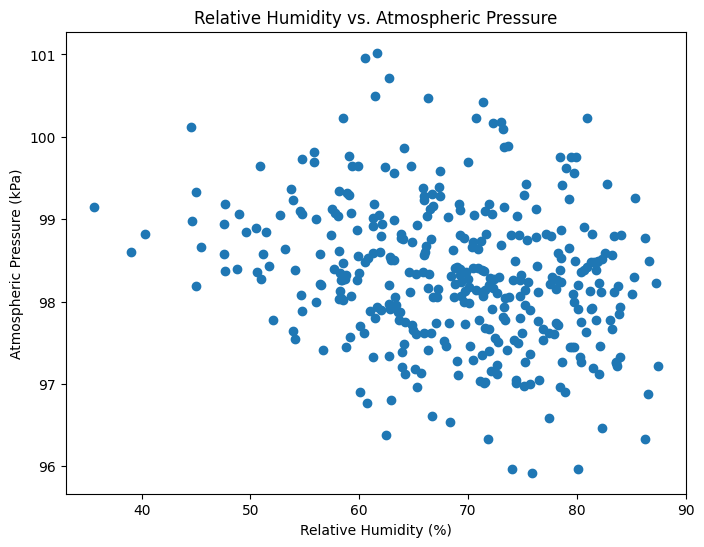

In [15]:
# Scatter plot for Relative Humidity vs. Atmospheric Pressure
plt.figure(figsize=(8, 6))
plt.scatter(df['Relative Humidity(percentage)'], df['Atmospheric Pressure(kilopascal)'])
plt.title('Relative Humidity vs. Atmospheric Pressure')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Atmospheric Pressure (kPa)')
plt.show()

## Forecast
### Autoregressive Integrated Moving Average (ARIMA): 
This is a versatile technique that models a combination of autoregression (AR), differencing (I), and moving average (MA). It's suitable for both stationary and non-stationary data.

In [42]:
new_df = df.copy()
# Setting the frequency
new_df = new_df.asfreq('D')

### Forecast result from 2023-09-29 to 2023-10-08

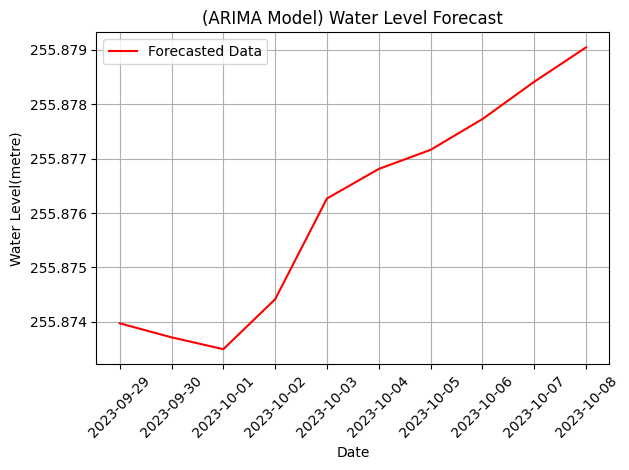

,Forecasted Water Level(metre)
Date,
2023-09-29,255.873972
2023-09-30,255.873713
2023-10-01,255.873496
2023-10-02,255.874414
2023-10-03,255.876268
2023-10-04,255.876811
2023-10-05,255.877163
2023-10-06,255.877728
2023-10-07,255.878415


In [56]:
time_series = new_df['Water Level(metre)']
model = ARIMA(time_series, order=(5,1,0))
model_fit = model.fit()  # Removed disp=0
forecast_steps = 10 # forecast next 10 days
forecast = model_fit.forecast(forecast_steps)  # forecast next 10 points

last_date = time_series.index[-1]
forecast_dates = pd.date_range(start=last_date, periods=forecast_steps + 1, inclusive='right')

plt.plot(forecast_dates, forecast, color='red', label='Forecasted Data')
plt.title('(ARIMA Model) Water Level Forecast')
plt.ylabel('Water Level(metre)')
plt.xlabel('Date')
plt.legend(loc='best')
plt.grid(True)

ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_useOffset(False)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Creating a DataFrame to display forecasted results as a table
forecast_df = pd.DataFrame({'Forecasted Water Level(metre)': forecast}, index=forecast_dates)
forecast_df.index.name = 'Date'  # Set the name of the index to 'Date'
display(forecast_df)

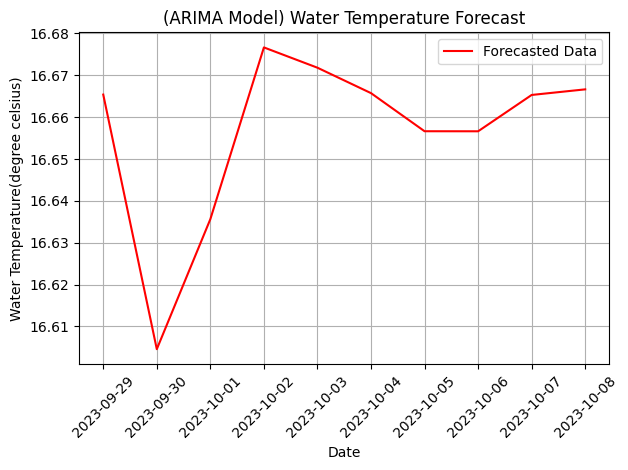

,Forecasted Water Temperature(degree celsius)
Date,
2023-09-29,16.665403
2023-09-30,16.604582
2023-10-01,16.635645
2023-10-02,16.676669
2023-10-03,16.671820
2023-10-04,16.665748
2023-10-05,16.656646
2023-10-06,16.656633
2023-10-07,16.665313


In [57]:
time_series = new_df['Water Temperature(degree celsius)']
model = ARIMA(time_series, order=(5,1,0))
model_fit = model.fit()  # Removed disp=0
forecast_steps = 10 # forecast next 10 days
forecast = model_fit.forecast(forecast_steps)  # forecast next 10 points

last_date = time_series.index[-1]
forecast_dates = pd.date_range(start=last_date, periods=forecast_steps + 1, inclusive='right')

plt.plot(forecast_dates, forecast, color='red', label='Forecasted Data')
plt.title('(ARIMA Model) Water Temperature Forecast')
plt.ylabel('Water Temperature(degree celsius)')
plt.xlabel('Date')
plt.legend(loc='best')
plt.grid(True)

ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_useOffset(False)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Creating a DataFrame to display forecasted results as a table
forecast_df = pd.DataFrame({'Forecasted Water Temperature(degree celsius)': forecast}, index=forecast_dates)
forecast_df.index.name = 'Date'  # Set the name of the index to 'Date'
display(forecast_df)

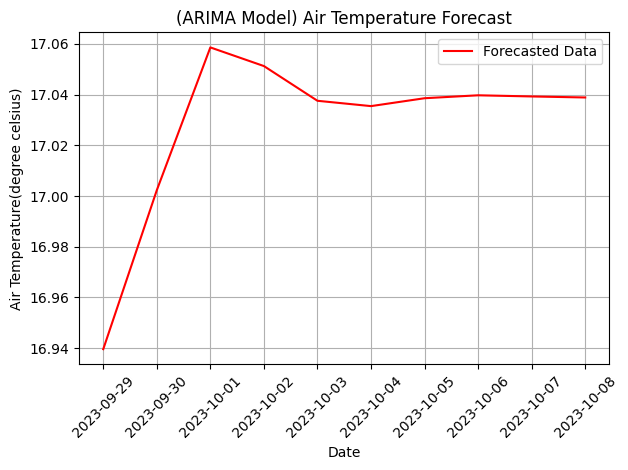

,Forecasted Air Temperature(degree celsius)
Date,
2023-09-29,16.939553
2023-09-30,17.002289
2023-10-01,17.058646
2023-10-02,17.051289
2023-10-03,17.037585
2023-10-04,17.035481
2023-10-05,17.038594
2023-10-06,17.039751
2023-10-07,17.039294


In [58]:
time_series = new_df['Air Temperature(degree celsius)']
model = ARIMA(time_series, order=(5,1,0))
model_fit = model.fit()  # Removed disp=0
forecast_steps = 10 # forecast next 10 days
forecast = model_fit.forecast(forecast_steps)  # forecast next 10 points

last_date = time_series.index[-1]
forecast_dates = pd.date_range(start=last_date, periods=forecast_steps + 1, inclusive='right')

plt.plot(forecast_dates, forecast, color='red', label='Forecasted Data')
plt.title('(ARIMA Model) Air Temperature Forecast')
plt.ylabel('Air Temperature(degree celsius)')
plt.xlabel('Date')
plt.legend(loc='best')
plt.grid(True)

ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_useOffset(False)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Creating a DataFrame to display forecasted results as a table
forecast_df = pd.DataFrame({'Forecasted Air Temperature(degree celsius)': forecast}, index=forecast_dates)
forecast_df.index.name = 'Date'  # Set the name of the index to 'Date'
display(forecast_df)

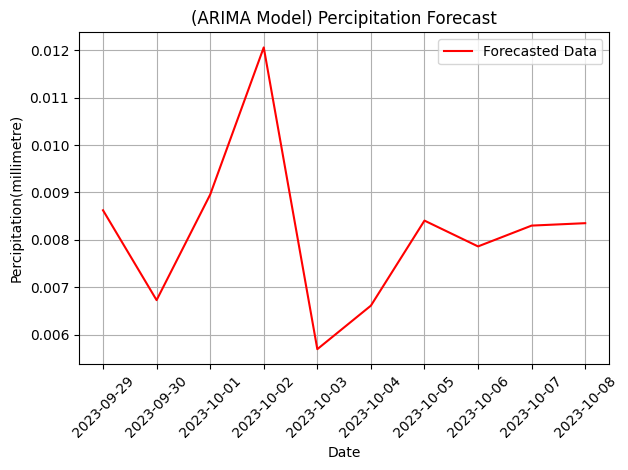

,Forecasted Percipitation(millimetre)
Date,
2023-09-29,0.008624
2023-09-30,0.006727
2023-10-01,0.008954
2023-10-02,0.012062
2023-10-03,0.005692
2023-10-04,0.006611
2023-10-05,0.008406
2023-10-06,0.007861
2023-10-07,0.008300


In [59]:
time_series = new_df['Percipitation(millimetre)']
model = ARIMA(time_series, order=(5,1,0))
model_fit = model.fit()  # Removed disp=0
forecast_steps = 10 # forecast next 10 days
forecast = model_fit.forecast(forecast_steps)  # forecast next 10 points

last_date = time_series.index[-1]
forecast_dates = pd.date_range(start=last_date, periods=forecast_steps + 1, inclusive='right')

plt.plot(forecast_dates, forecast, color='red', label='Forecasted Data')
plt.title('(ARIMA Model) Percipitation Forecast')
plt.ylabel('Percipitation(millimetre)')
plt.xlabel('Date')
plt.legend(loc='best')
plt.grid(True)

ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_useOffset(False)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Creating a DataFrame to display forecasted results as a table
forecast_df = pd.DataFrame({'Forecasted Percipitation(millimetre)': forecast}, index=forecast_dates)
forecast_df.index.name = 'Date'  # Set the name of the index to 'Date'
display(forecast_df)

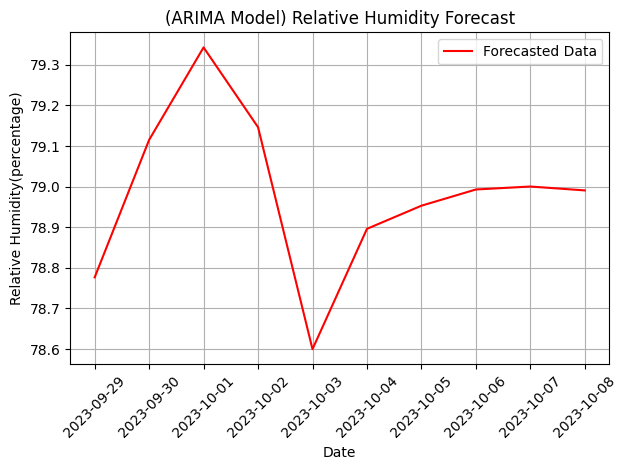

,Forecasted Relative Humidity(percentage)
Date,
2023-09-29,78.776584
2023-09-30,79.115135
2023-10-01,79.342827
2023-10-02,79.146335
2023-10-03,78.599799
2023-10-04,78.896126
2023-10-05,78.953067
2023-10-06,78.992984
2023-10-07,79.000306


In [60]:
time_series = new_df['Relative Humidity(percentage)']
model = ARIMA(time_series, order=(5,1,0))
model_fit = model.fit()  # Removed disp=0
forecast_steps = 10 # forecast next 10 days
forecast = model_fit.forecast(forecast_steps)  # forecast next 10 points

last_date = time_series.index[-1]
forecast_dates = pd.date_range(start=last_date, periods=forecast_steps + 1, inclusive='right')

plt.plot(forecast_dates, forecast, color='red', label='Forecasted Data')
plt.title('(ARIMA Model) Relative Humidity Forecast')
plt.ylabel('Relative Humidity(percentage)')
plt.xlabel('Date')
plt.legend(loc='best')
plt.grid(True)

ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_useOffset(False)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Creating a DataFrame to display forecasted results as a table
forecast_df = pd.DataFrame({'Forecasted Relative Humidity(percentage)': forecast}, index=forecast_dates)
forecast_df.index.name = 'Date'  # Set the name of the index to 'Date'
display(forecast_df)

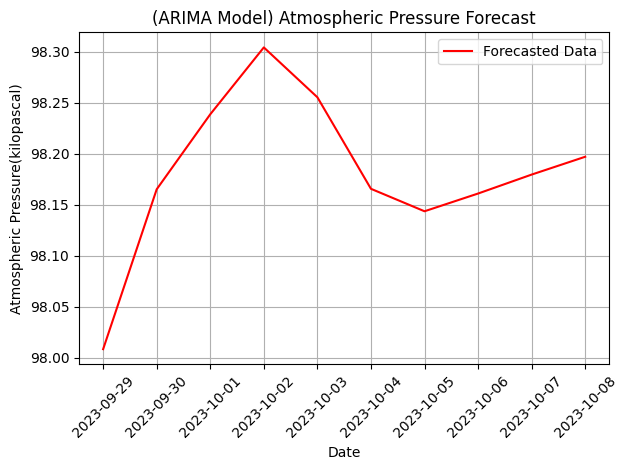

,Forecasted Atmospheric Pressure(kilopascal)
Date,
2023-09-29,98.008542
2023-09-30,98.165212
2023-10-01,98.238715
2023-10-02,98.304239
2023-10-03,98.255383
2023-10-04,98.165683
2023-10-05,98.143680
2023-10-06,98.161060
2023-10-07,98.179628


In [62]:
time_series = new_df['Atmospheric Pressure(kilopascal)']

# Check if the frequency is set
# print(time_series.index.freq)  # Should print <Day>

# ARIMA modeling
model = ARIMA(time_series, order=(5,1,0))
model_fit = model.fit()
forecast_steps = 10
forecast = model_fit.forecast(forecast_steps)

last_date = time_series.index[-1]

# Using inclusive instead of closed
forecast_dates = pd.date_range(start=last_date, periods=forecast_steps + 1, inclusive='right')

plt.plot(forecast_dates, forecast, color='red', label='Forecasted Data')
plt.title('(ARIMA Model) Atmospheric Pressure Forecast')
plt.ylabel('Atmospheric Pressure(kilopascal)')
plt.xlabel('Date')
plt.legend(loc='best')
plt.grid(True)

ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_useOffset(False)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Creating a DataFrame to display forecasted results as a table
forecast_df = pd.DataFrame({'Forecasted Atmospheric Pressure(kilopascal)': forecast}, index=forecast_dates)
forecast_df.index.name = 'Date'  # Set the name of the index to 'Date'
display(forecast_df)